# Selecting a dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# download data
data = pd.read_csv('Amazon Review Data Web Scrapping - Amazon Review Data Web Scrapping.csv')
print(data.describe())
data.head()


           Unique_ID        Rating
count   60889.000000  60889.000000
mean   140444.000000      4.081148
std     17577.284607      1.342067
min    110000.000000      1.000000
25%    125222.000000      4.000000
50%    140444.000000      5.000000
75%    155666.000000      5.000000
max    170888.000000      5.000000


,Unique_ID,Category,Review_Header,Review_text,Rating,Own_Rating
0,136040,smartTv,Nice one,I liked it,5,Positive
1,134236,mobile,Huge battery life with amazing display,I bought the phone on Amazon and been using my...,5,Positive
2,113945,books,Four Stars,"Awesome book at reasonable price, must buy ......",4,Positive
3,168076,smartTv,Nice quality,good,5,Positive
4,157302,books,Nice book,"The book is fine,not bad,contains nice concept...",3,Neutral


In [2]:
num_rows = data.shape[0]
print("Number of rows in the DataFrame:", num_rows)


Number of rows in the DataFrame: 60889


#  Exploring the data.

In [3]:
# Create a mapping of sentiments to numeric values
sentiment_mapping = {"Positive": 1, "Neutral": 2, "Negative": 3}
# Apply the mapping to the data
data['sentiments_numeric'] = data['Own_Rating'].map(sentiment_mapping)
data.head()

,Unique_ID,Category,Review_Header,Review_text,Rating,Own_Rating,sentiments_numeric
0,136040,smartTv,Nice one,I liked it,5,Positive,1
1,134236,mobile,Huge battery life with amazing display,I bought the phone on Amazon and been using my...,5,Positive,1
2,113945,books,Four Stars,"Awesome book at reasonable price, must buy ......",4,Positive,1
3,168076,smartTv,Nice quality,good,5,Positive,1
4,157302,books,Nice book,"The book is fine,not bad,contains nice concept...",3,Neutral,2


In [4]:
data['sentiments_numeric'].value_counts()

1    47436
3     9087
2     4366
Name: sentiments_numeric, dtype: int64

<BarContainer object of 3 artists>

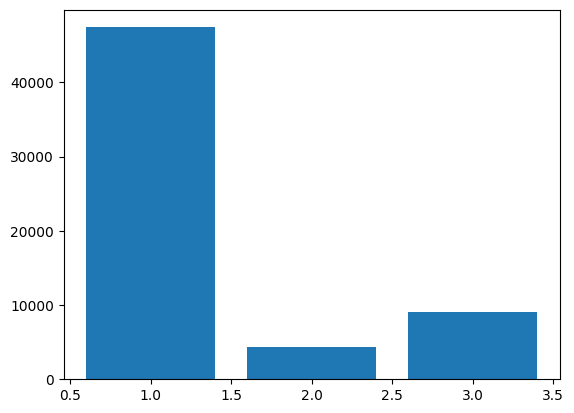

In [5]:
plt.bar(data['sentiments_numeric'].value_counts().index, data['sentiments_numeric'].value_counts().values)

In [6]:
# Check for missing values
print(data.isnull().sum())


Unique_ID              0
Category               0
Review_Header          3
Review_text           28
Rating                 0
Own_Rating             0
sentiments_numeric     0
dtype: int64


All the columns have no missing values except for the Review_header and Review_text columns.
The column Review_text, which we are using in the analysis, has 28 missing values which means that there are 28 rows in the dataset where the Review_text column does not have a value.

# Assemble a preprocessing script.

The preprocessing script is in a seperate python file, but here is an explanation justifying the choices made to preprocess the reviews text.

For Amazon reviews specifically, these preprocessing steps are chosen because they help make the reviews text more consistent, cleaner, and easier to work with for sentiment analysis. These preprocessing steps can make the sentiment signals more apparent and reduce irrelevant information. 
I used : 
- Removing URLs: URLs often don't contain meaningful information in the context of text analysis so I considered removing them in case we have a review with an URL.
- Tokenization: is splitting text into individual words or tokens. It is very important for sentiment analysis that I am willing to do because. It helps understand the sentiment associated with specific words or phrases.
- Converting to Lowercase: Converting all text to lowercase is usefull so that the model doesn't treat "word" and "Word" as two different words.
- Removing Stopwords: Stopwords are common words like "and," "the," "in," ..., they don't carry significant meaning for sentiment analysis.
- Lemmatization: Lemmatization reduces words to their base or root form. This is important to make sure that related words are treated as the same word.